## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Loading the data

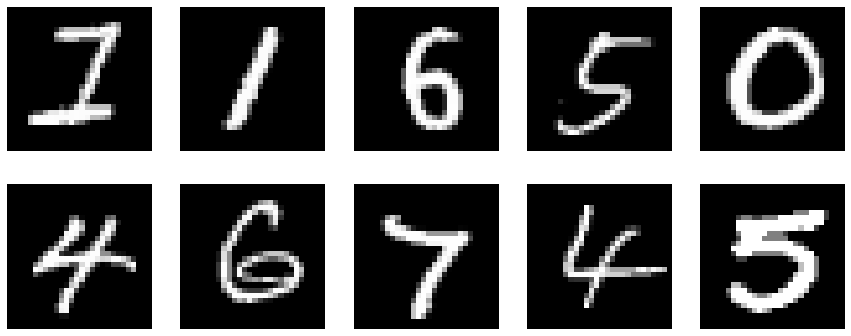

In [2]:
train_data = pd.read_csv("E:\Work Space\Ecko data\mnist_train\mnist_train.csv").values
X_train = train_data[:,1:]
y_train = train_data[:,0]
rand_idx = np.random.choice(train_data.shape[0],10)
fig,ax = plt.subplots(2,5,figsize=(15,6))
c = 0
for i in range(2):
    for j in range(5):
        img_arr = X_train[rand_idx[c],:]
        img_arr = np.uint8(img_arr.reshape(28,28))
        ax[i,j].imshow(img_arr, cmap="gray")
        ax[i,j].set_axis_off()
        c += 1
plt.show()

## Scaling the data

In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

## Training the MLP classifier

In [4]:
clf1 = MLPClassifier(hidden_layer_sizes = (24,40,64), activation = 'logistic',
                    solver = 'adam', learning_rate_init = 0.005,
                    max_iter = 1000,random_state = 1)

clf1.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(24, 40, 64),
              learning_rate_init=0.005, max_iter=1000, random_state=1)

## Testing the data

In [5]:
test_data = pd.read_csv("E:\Work Space\Ecko data\mnist_test\mnist_test.csv").values
X_test = test_data[:,1:]
y_test = test_data[:,0]
X_test = scaler.fit_transform(X_test) 
y_pred_MLP = clf1.predict(X_test)
print("Accuracy Score of our multi-class classifier is: {}".format(accuracy_score(np.ravel(y_test),y_pred_MLP)))

Accuracy Score of our multi-class classifier is: 0.94


## Checking with SVM

In [6]:
from sklearn import svm

In [7]:
clf2 = svm.SVC(kernel='poly')

clf2.fit(X_train, y_train) 

SVC(kernel='poly')

In [9]:
y_pred_SVM = clf2.predict(X_test)

print("Accuracy Score of our SVM classifier is: {}".format(accuracy_score(np.ravel(y_test),y_pred_SVM))) 

Accuracy Score of our SVM classifier is: 0.9611
